For 2-4-6 Potential

In [1]:
import numpy as np

In [2]:
import Var_Hex_Pot_Act

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib nbagg

In [5]:
import scipy.interpolate as sci

In [6]:
alpha_eff_array = np.linspace(0.5, 2.0/3.0, 201)[::-1]

In [7]:
alpha_eff_array

array([0.66666667, 0.66583333, 0.665     , 0.66416667, 0.66333333,
       0.6625    , 0.66166667, 0.66083333, 0.66      , 0.65916667,
       0.65833333, 0.6575    , 0.65666667, 0.65583333, 0.655     ,
       0.65416667, 0.65333333, 0.6525    , 0.65166667, 0.65083333,
       0.65      , 0.64916667, 0.64833333, 0.6475    , 0.64666667,
       0.64583333, 0.645     , 0.64416667, 0.64333333, 0.6425    ,
       0.64166667, 0.64083333, 0.64      , 0.63916667, 0.63833333,
       0.6375    , 0.63666667, 0.63583333, 0.635     , 0.63416667,
       0.63333333, 0.6325    , 0.63166667, 0.63083333, 0.63      ,
       0.62916667, 0.62833333, 0.6275    , 0.62666667, 0.62583333,
       0.625     , 0.62416667, 0.62333333, 0.6225    , 0.62166667,
       0.62083333, 0.62      , 0.61916667, 0.61833333, 0.6175    ,
       0.61666667, 0.61583333, 0.615     , 0.61416667, 0.61333333,
       0.6125    , 0.61166667, 0.61083333, 0.61      , 0.60916667,
       0.60833333, 0.6075    , 0.60666667, 0.60583333, 0.605  

In [8]:
file = open("S_alpha_246_template_alpha_vals.txt", "w+")
for i in alpha_eff_array:
    file.write(str(i) + " \n")
file.close()

First lets do dof=3

In [9]:
dof=3

Have copied below code from Act_Temp_246

In [10]:
compare1 = list(abs(alpha_eff_array - 0.507))
find_index1 = compare1.index(min(compare1))
if alpha_eff_array[find_index1] > 0.507:
    find_index1 = find_index1 + 1

compare2 = list(abs(alpha_eff_array - 0.520))
find_index2 = compare2.index(min(compare2))
if alpha_eff_array[find_index2] < 0.520:
    find_index2 = find_index2 - 1

In [11]:
a1_3 = list(alpha_eff_array)[:(find_index2 + 1)]
a2_3 = list(alpha_eff_array)[find_index1:] 
a3_3 = list(alpha_eff_array)[(find_index2 + 1):find_index1]

In [15]:
if 0.5 in a2_3:
    find_index3 = a2_3.index(0.5)
    a2_3[find_index3] = 0.500001
    
s_vals = []
r_vals = []
p_vals = []

linear_bound_l = []
linear_bound_u = []
    
print("#     Alpha     S       R     Phi_0")
for a in a1_3:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    if a == a1_3[-1]:
        linear_bound_u.append(a)
        linear_bound_u.append(s)
        linear_bound_u.append(r)
    
s_buffer, r_buffer, phi_0_buffer = Var_Hex_Pot_Act.get_S(a2_3[0], D=dof)
linear_bound_l.append(a2_3[0])
linear_bound_l.append(s_buffer)
linear_bound_l.append(r_buffer)
    
for a in a3_3:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, al_506= linear_bound_l, al_513= linear_bound_u, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    
s_vals.append(s_buffer)
r_vals.append(r_buffer)
p_vals.append(phi_0_buffer)
print((len(s_vals), a2_3[0], s_vals[-1], r_vals[-1], p_vals[-1]))
    
for a in a2_3[1:]:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))

#     Alpha     S       R     Phi_0
(1, 0.6666666666666666, 0.4048683193267049, array(12.01141983), 0.21484375)
(2, 0.6658333333333333, 0.48813478549494377, array(11.36151639), 0.24207431498542425)
(3, 0.665, 0.5690808359662953, array(10.70656107), 0.26954812877982115)
(4, 0.6641666666666666, 0.648890093441742, array(10.05205828), 0.29727955890383984)
(5, 0.6633333333333333, 0.7257482002225348, array(9.44600449), 0.32437310501238636)
(6, 0.6625, 0.8017936215587128, array(8.87816056), 0.35110983744562874)
(7, 0.6616666666666666, 0.874769320065471, array(8.38351174), 0.37657398439757617)
(8, 0.6608333333333333, 0.9446267671373187, array(7.95959655), 0.40059807833845995)
(9, 0.6599999999999999, 1.0130293354574003, array(7.58601876), 0.4235751622936713)
(10, 0.6591666666666667, 1.0798376756147463, array(7.25974751), 0.4454239999370073)
(11, 0.6583333333333333, 1.144676060253007, array(6.97799622), 0.4660398867398673)
(12, 0.6575, 1.2077795404634253, array(6.73344108), 0.4855075285636641)
(

(104, 0.5808333333333333, 10.598965166646447, array(5.06985813), 0.9884690217986987)
(105, 0.58, 10.837159821842567, array(5.09946028), 0.9892035771602855)
(106, 0.5791666666666666, 11.082497922709312, array(5.12985643), 0.9899033067172882)
(107, 0.5783333333333334, 11.33526917069961, array(5.16106606), 0.9905692167582884)
(108, 0.5775, 11.595813701168028, array(5.19310764), 0.9912023997691912)
(109, 0.5766666666666667, 11.86445828808621, array(5.22600216), 0.9918038546651193)
(110, 0.5758333333333333, 12.141555390751675, array(5.25977256), 0.9923745398486405)
(111, 0.575, 12.427483893826121, array(5.29444121), 0.9929154732873186)
(112, 0.5741666666666667, 12.72263513059499, array(5.33003238), 0.9934276315463348)
(113, 0.5733333333333334, 13.027427050996849, array(5.36657215), 0.9939119752702552)
(114, 0.5725, 13.342300003318924, array(5.40408689), 0.9943694734466051)
(115, 0.5716666666666667, 13.667715487368385, array(5.44260603), 0.9948010307764106)
(116, 0.5708333333333333, 14.00417

<IPython.core.display.Javascript object>


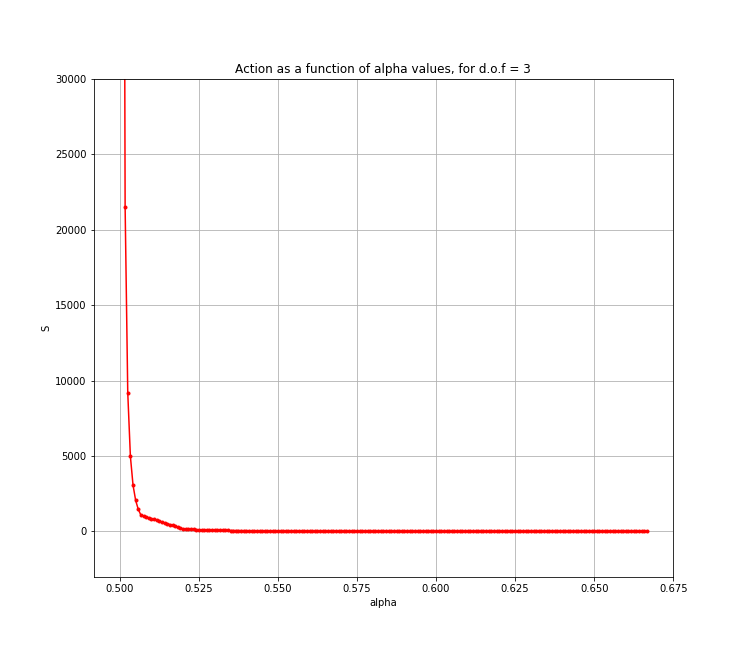

In [16]:
plt.close()
plt.plot(alpha_eff_array, s_vals, 'r.-')
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-3000, 30000)
plt.grid(True)
#print("Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity \nas alpha tends to 0.5")

In [17]:
plt.close()

In [18]:
file = open("S_alpha_246_template_dof_3_S_vals.txt", "w+")
for i in s_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_246_template_dof_3_R_vals.txt", "w+")
for i in r_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_246_template_dof_3_Phi_vals.txt", "w+")
for i in p_vals:
    file.write(str(i) + " \n")
file.close()

Now we do dof=4

In [19]:
dof=4

In [20]:
compare3 = list(abs(alpha_eff_array - 0.532))
find_index4 = compare3.index(min(compare3))
if alpha_eff_array[find_index4] < 0.532:
    find_index4 = find_index4 - 1

In [21]:
a1_4 = list(alpha_eff_array)[:(find_index4 + 1)]
a2_4 = list(alpha_eff_array)[find_index1:] 
a3_4 = list(alpha_eff_array)[(find_index4 + 1):find_index1]

In [22]:
if 0.5 in a2_4:
    find_index5 = a2_4.index(0.5)
    a2_4[find_index5] = 0.500001

s_vals = []
r_vals = []
p_vals = []

linear_bound_l = []
linear_bound_u = []
    
print("#     Alpha     S       R     Phi_0")
for a in a1_4:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    if a == a1_4[-1]:
        linear_bound_u.append(a)
        linear_bound_u.append(s)
        linear_bound_u.append(r)
    
s_buffer, r_buffer, phi_0_buffer = Var_Hex_Pot_Act.get_S(a2_4[0], D=dof)
linear_bound_l.append(a2_4[0])
linear_bound_l.append(s_buffer)
linear_bound_l.append(r_buffer)
    
for a in a3_4:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, al_506= linear_bound_l, al_513= linear_bound_u, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))
    
s_vals.append(s_buffer)
r_vals.append(r_buffer)
p_vals.append(phi_0_buffer)
print((len(s_vals), a2_4[0], s_vals[-1], r_vals[-1], p_vals[-1]))
    
for a in a2_4[1:]:
    s, r, phi_0 = Var_Hex_Pot_Act.get_S(a, D=dof)
    s_vals.append(s)
    r_vals.append(r)
    p_vals.append(phi_0)
    print((len(s_vals), a, s_vals[-1], r_vals[-1], p_vals[-1]))

#     Alpha     S       R     Phi_0
(1, 0.6666666666666666, 16.106696855518788, array(6.67423376), 0.609375)
(2, 0.6658333333333333, 17.183095549688566, array(6.25011868), 0.6567533617437049)
(3, 0.665, 18.19199660276576, array(5.94908165), 0.6942083470792543)
(4, 0.6641666666666666, 19.152315219089484, array(5.72715537), 0.7244408422605157)
(5, 0.6633333333333333, 20.088458756490112, array(5.55581559), 0.7496051169421718)
(6, 0.6625, 20.97027265937701, array(5.42637137), 0.7702660079132819)
(7, 0.6616666666666666, 21.866375518769587, array(5.31773657), 0.7884804589920349)
(8, 0.6608333333333333, 22.730259173814346, array(5.23170148), 0.8040091174228156)
(9, 0.6599999999999999, 23.566315847418508, array(5.16274766), 0.817420102259383)
(10, 0.6591666666666667, 24.42389098037746, array(5.10221756), 0.8296481793528476)
(11, 0.6583333333333333, 25.27514626998966, array(5.05158021), 0.8405507271317745)
(12, 0.6575, 26.115822179817023, array(5.00952986), 0.8502869596156217)
(13, 0.6566666666

(104, 0.5808333333333333, 286.92285679348686, array(6.59125539), 0.999297867058808)
(105, 0.58, 296.0482974053465, array(6.64014488), 0.9993609111557624)
(106, 0.5791666666666666, 305.54962054716214, array(6.69009298), 0.9994193474871418)
(107, 0.5783333333333334, 315.4473952971577, array(6.74113179), 0.9994734305301745)
(108, 0.5775, 325.7636207127048, array(6.79329568), 0.9995234092798579)
(109, 0.5766666666666667, 336.5184390102838, array(6.84661618), 0.9995695021485873)
(110, 0.5758333333333333, 347.73905455166124, array(6.90113527), 0.9996119603223063)
(111, 0.575, 359.44683597573885, array(6.95688401), 0.9996509735483802)
(112, 0.5741666666666667, 371.67245295230674, array(7.01390734), 0.9996867705256355)
(113, 0.5733333333333334, 384.4452963461297, array(7.07224684), 0.9997195502720828)
(114, 0.5725, 397.7921592271983, array(7.13194088), 0.999749495212652)
(115, 0.5716666666666667, 411.75035806060987, array(7.19303986), 0.9997768015986919)
(116, 0.5708333333333333, 426.353981858

<IPython.core.display.Javascript object>


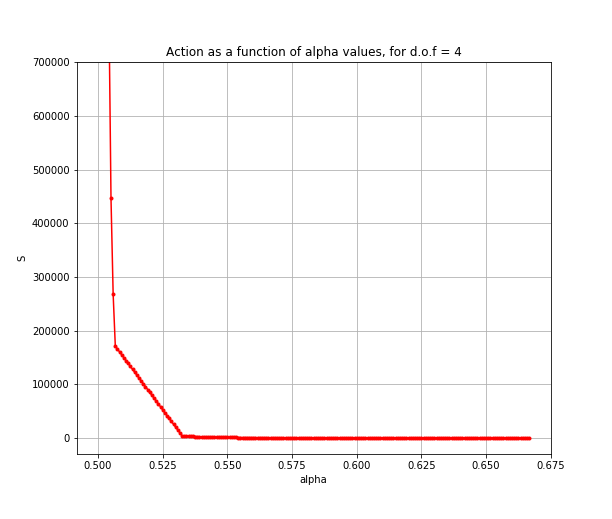

In [23]:
plt.close()
plt.plot(alpha_eff_array, s_vals, 'r.-')
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
#print("Last 4 values are off screen and the graph *seems* vertical there, as graph asymptoically tends to infinity \nas alpha tends to 0.5")

In [24]:
plt.close()

In [25]:
file = open("S_alpha_246_template_dof_4_S_vals.txt", "w+")
for i in s_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_246_template_dof_4_R_vals.txt", "w+")
for i in r_vals:
    file.write(str(i) + " \n")
file.close()

file = open("S_alpha_246_template_dof_4_Phi_vals.txt", "w+")
for i in p_vals:
    file.write(str(i) + " \n")
file.close()

Great! Now that we have transcribed the data, let us form a template from it.

In [23]:
s_data_dof_3 = []
s_data_dof_4 = []

file2 = open("S_alpha_template_dof_3_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_3.append(float(word2))
file2.close()

file2 = open("S_alpha_template_dof_4_S_vals.txt", "r")
for line2 in file2:
    for word2 in line2.split(): 
        s_data_dof_4.append(float(word2))
file2.close()

In [24]:
s_data_dof_3 = np.array(s_data_dof_3)
s_data_dof_4 = np.array(s_data_dof_4)

In [25]:
x_new = np.linspace(0.5, 2.0/3.0, 1000)

In [26]:
a = sci.interp1d(alpha_eff_array[::-1], s_data_dof_3[::-1]) #this is equivalent to weighted average

In [27]:
b = sci.pchip_interpolate(alpha_eff_array[::-1], s_data_dof_3[::-1], x_new) #this works the same way as d

In [28]:
c = sci.Akima1DInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1]) #not as effective as d

In [29]:
d = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

In [30]:
j = sci.BarycentricInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

<IPython.core.display.Javascript object>


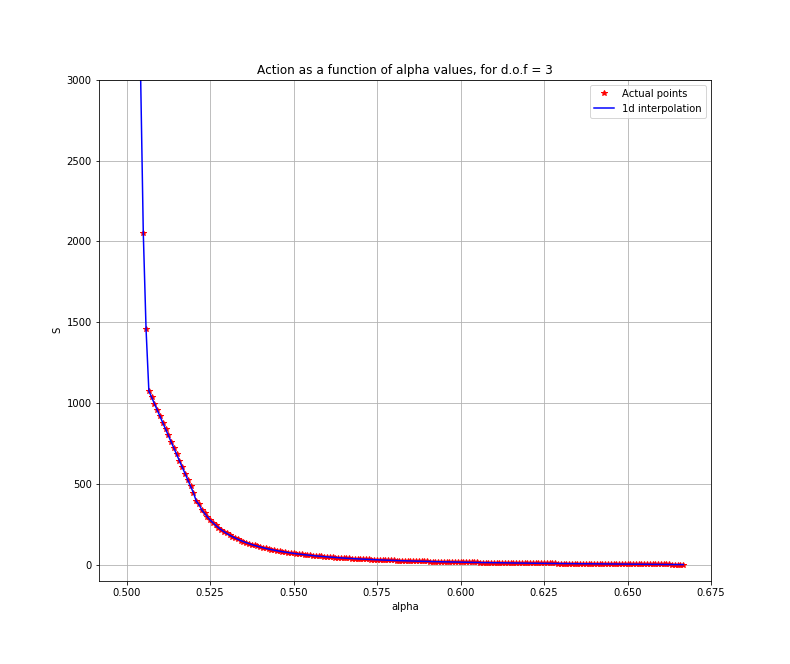

In [31]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, a(x_new), 'b-', label="1d interpolation")
#plt.plot(x_new, b, 'g-', label="PCHIP_interpolate")
#plt.plot(x_new, c(x_new), 'm-', label="Akima")
#plt.plot(x_new, d(x_new), 'g-', label="PCHIP")
#plt.plot(x_new, j(x_new), 'k-', label="Barycentric")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [32]:
plt.close()

In [33]:
s3_vals = list(s_data_dof_3[:len(a1_3)])
for y in s_data_dof_3[find_index1:]:
    s3_vals.append(y)
s3_vals = np.array(s3_vals[::-1])

a3_vals = a1_3[:]
for x in a2_3:
    a3_vals.append(x)

a3_vals = np.array(a3_vals[::-1])

In [34]:
h = sci.PchipInterpolator(a3_vals, s3_vals)

<IPython.core.display.Javascript object>


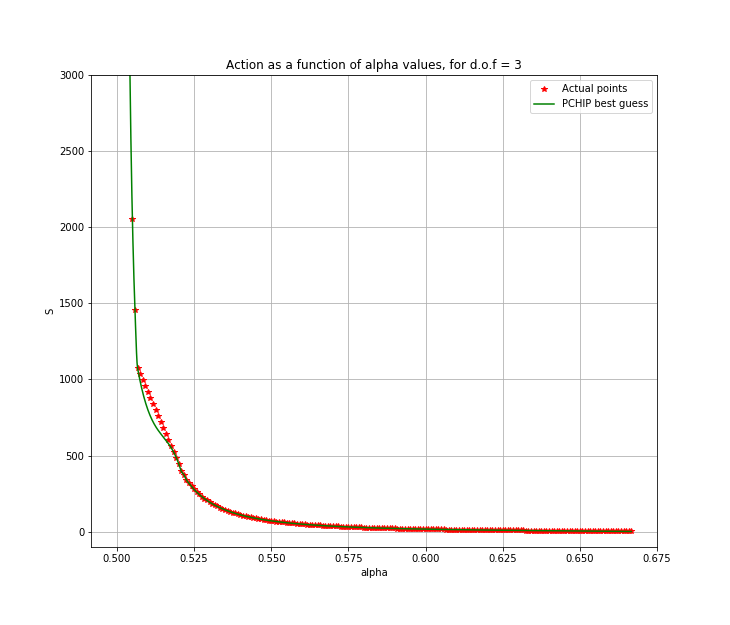

In [35]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, h(x_new), 'g-', label="PCHIP best guess")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [36]:
plt.close()

In [37]:
s3_vals2 = list(s_data_dof_3[:len(a1_4)])
for y in s_data_dof_3[find_index1:]:
    s3_vals2.append(y)
s3_vals2 = np.array(s3_vals2[::-1])

a3_vals2 = a1_4[:]
for x in a2_4:
    a3_vals2.append(x)

a3_vals2 = np.array(a3_vals2[::-1])

In [38]:
l = sci.PchipInterpolator(a3_vals2, s3_vals2)

<IPython.core.display.Javascript object>


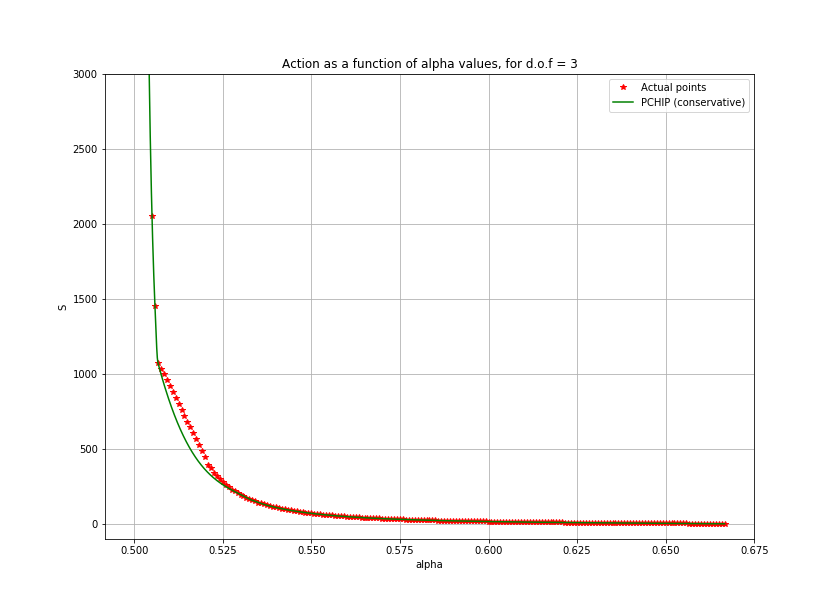

In [39]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r*', label= "Actual points")
plt.plot(x_new, l(x_new), 'g-', label="PCHIP (conservative)")
plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.grid(True)
plt.legend()

In [40]:
plt.close()

In [41]:
m = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_3[::-1])

<IPython.core.display.Javascript object>


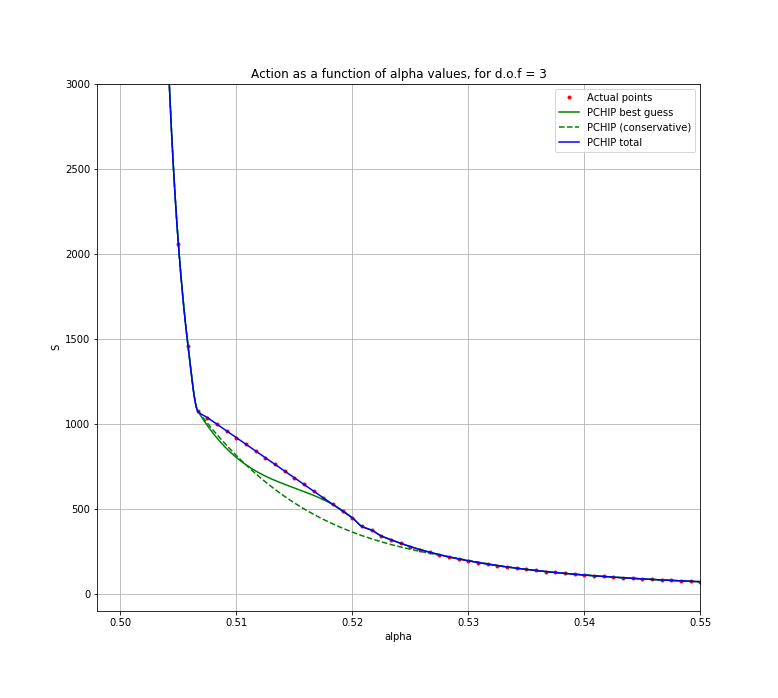

In [42]:
x_test = np.linspace(0.5, 0.55, 1000)

plt.close()
plt.plot(alpha_eff_array, s_data_dof_3, 'r.', label= "Actual points")
#plt.plot(x_test, a(x_test), 'r-', label="1d interpolation")
plt.plot(x_test, h(x_test), 'g-', label="PCHIP best guess")
plt.plot(x_test, l(x_test), 'g--', label="PCHIP (conservative)")
plt.plot(x_test, m(x_test), 'b-', label="PCHIP total")

plt.title("Action as a function of alpha values, for d.o.f = 3")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-100, 3000)
plt.xlim(0.498, 0.55)
plt.grid(True)
plt.legend()

In [43]:
plt.close()

In [44]:
s4_vals = list(s_data_dof_4[:len(a1_4)])
for y in s_data_dof_4[find_index1:]:
    s4_vals.append(y)
s4_vals = np.array(s4_vals[::-1])

a4_vals = a1_4[:]
for x in a2_4:
    a4_vals.append(x)

a4_vals = np.array(a4_vals[::-1])

In [45]:
i = sci.PchipInterpolator(a4_vals, s4_vals)

In [46]:
k = sci.interp1d(alpha_eff_array[::-1], s_data_dof_4[::-1])

<IPython.core.display.Javascript object>


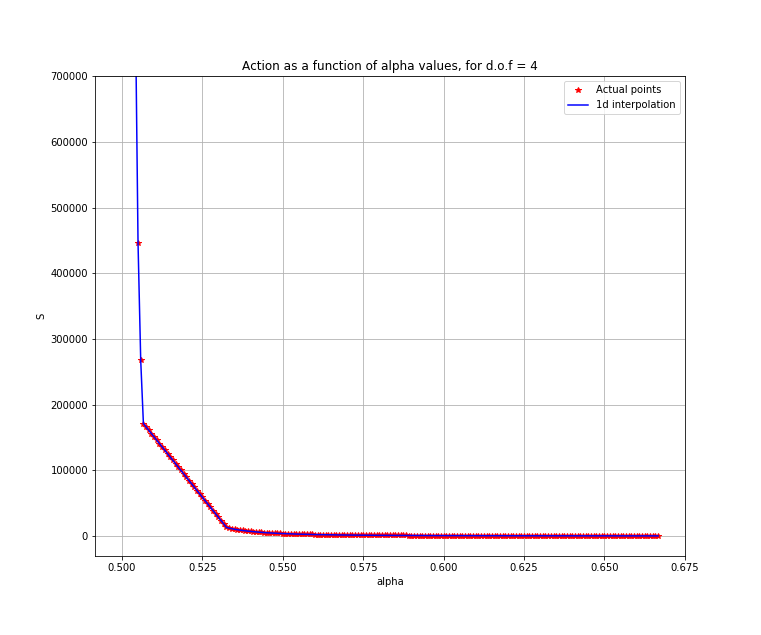

In [47]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_4, 'r*', label= "Actual points")
plt.plot(x_new, k(x_new), 'b-', label="1d interpolation")
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
plt.legend()

In [48]:
plt.close()

In [49]:
n = sci.PchipInterpolator(alpha_eff_array[::-1], s_data_dof_4[::-1])

<IPython.core.display.Javascript object>


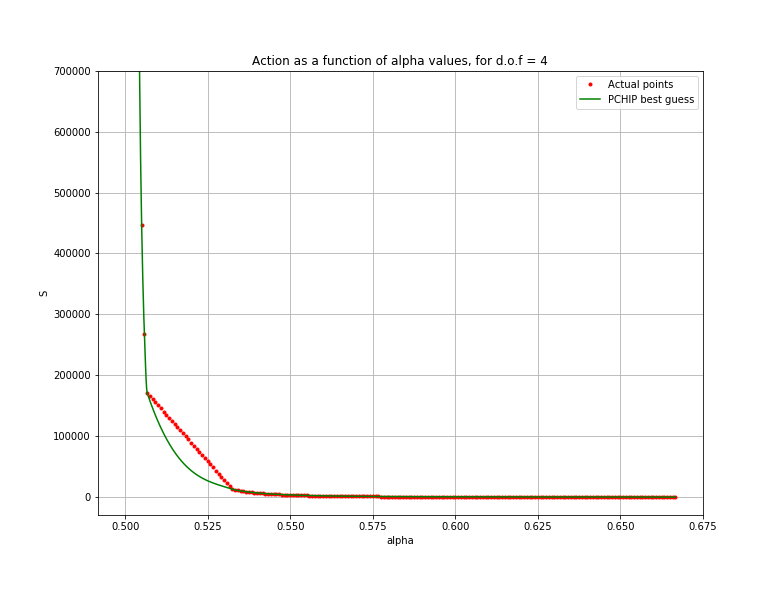

In [50]:
plt.close()
plt.plot(alpha_eff_array, s_data_dof_4, 'r.', label= "Actual points")
plt.plot(x_new, i(x_new), 'g-', label="PCHIP best guess")
#plt.plot(x_new, n(x_new), 'b-', label="PCHIP total")
plt.title("Action as a function of alpha values, for d.o.f = 4")
plt.xlabel("alpha")
plt.ylabel("S")
plt.ylim(-30000, 700000)
plt.grid(True)
plt.legend()

In [51]:
plt.close()